###### 1. Project SWIPECAR
##### The current process suffers from the following problems:

They have been using manual traditional measures to estimate old cars prices.
These measures are time consuming and not accurate.
Company is looking for a robust way to estimate the prices of used cars.

Recently they got to know about data scientists who help businesses to sort out such issues.They decided to hire a team of data scientists. Consider you are one of them.


###### 2. Data Description

In [55]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
from collections import Counter  
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore") 

In [56]:
dataTest = pd.read_csv(filepath_or_buffer='H:/EDA-22/TestData.csv',index_col=False)
dataTrain = pd.read_csv(filepath_or_buffer='H:/EDA-22/TrainData.csv')
print('Data Shape:', dataTrain.shape)


Data Shape: (181, 27)


In [57]:
dataTrain.head()

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.40000,175.60000,66.50000,53.90000,2458,ohc,four,122,mpfi,3.31,3.54,8.70000,92,4200,27,32,11248
1,2,0,188,bmw,gas,std,two,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2710,ohc,six,164,mpfi,3.31,3.19,9.00000,121,4250,21,28,20970
2,3,0,?,renault,gas,std,four,wagon,fwd,front,96.10000,181.50000,66.50000,55.20000,2579,ohc,four,132,mpfi,3.46,3.9,8.70000,?,?,23,31,9295
3,4,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.90000,186.70000,68.40000,56.70000,3197,l,four,152,idi,3.7,3.52,21.00000,95,4150,28,33,13200
4,5,-2,103,volvo,gas,std,four,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2935,ohc,four,141,mpfi,3.78,3.15,9.50000,114,5400,24,28,15985


In [58]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  181 non-null    object 
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       181 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

In [59]:
dataTest.set_index('ID')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,-2,103,volvo,gas,std,four,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2912,ohc,four,141,mpfi,3.78000,3.15000,9.50000,114,5400,23,28
2,0,188,bmw,gas,std,four,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2765,ohc,six,164,mpfi,3.31000,3.19000,9.00000,121,4250,21,28
3,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.30000,188.80000,67.20000,57.50000,3157,ohc,four,130,mpfi,3.62000,3.15000,7.50000,162,5100,17,22
4,1,154,plymouth,gas,std,four,sedan,fwd,front,93.70000,167.30000,63.80000,50.80000,1989,ohc,four,90,2bbl,2.97000,3.23000,9.40000,68,5500,31,38
5,1,103,nissan,gas,std,four,wagon,fwd,front,94.50000,170.20000,63.80000,53.50000,2037,ohc,four,97,2bbl,3.15000,3.29000,9.40000,69,5200,31,37
6,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.30000,171.70000,65.50000,55.70000,2319,ohc,four,97,idi,3.01000,3.40000,23.00000,68,4500,37,42
7,0,118,mazda,gas,std,four,sedan,rwd,front,104.90000,175.00000,66.10000,54.40000,2670,ohc,four,140,mpfi,3.76000,3.16000,8.00000,120,5000,19,27
8,0,161,peugot,gas,std,four,sedan,rwd,front,107.90000,186.70000,68.40000,56.70000,3020,l,four,120,mpfi,3.46000,3.19000,8.40000,97,5000,19,24
9,1,101,honda,gas,std,two,hatchback,fwd,front,93.70000,150.00000,64.00000,52.60000,1956,ohc,four,92,1bbl,2.91000,3.41000,9.20000,76,6000,30,34


In [60]:
#Extracting Categorical and numerical data 
cat_col = [column for column in dataTrain.columns if dataTrain[column].dtypes == 'O']
print(cat_col)

['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm']


In [61]:
num_col = [column for column in dataTrain.columns if dataTrain[column].dtypes != 'O']
print(num_col)

['ID', 'symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg', 'price']


In [62]:
#Missing values checking
dataTrain.isnull().sum().sum()

0

In [63]:
#Duplicate Values values checking
dataTrain.duplicated().sum()


0

In [64]:
#Unique Values values checking
dataTrain.nunique()

ID                   181
symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            52
length                72
width                 43
height                48
curb-weight          155
engine-type            6
num-of-cylinders       7
engine-size           43
fuel-system            8
bore                  37
stroke                35
compression-ratio     32
horsepower            58
peak-rpm              23
city-mpg              27
highway-mpg           30
price                168
dtype: int64

In [65]:
dataTrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,181.00000,91.00000,52.39434,1.00000,46.00000,91.00000,136.00000,181.00000
symboling,181.00000,0.85083,1.26704,-2.00000,0.00000,1.00000,2.00000,3.00000
wheel-base,181.00000,98.72928,6.11620,86.60000,94.50000,96.90000,102.40000,120.90000
length,181.00000,174.17403,12.33657,141.10000,166.80000,173.20000,183.10000,208.10000
width,181.00000,65.94365,2.14611,60.30000,64.20000,65.50000,66.60000,72.00000
height,181.00000,53.70994,2.49773,47.80000,51.60000,54.10000,55.50000,59.80000
curb-weight,181.00000,2564.16575,523.48902,1488.00000,2190.00000,2420.00000,2935.00000,4066.00000
engine-size,181.00000,127.90055,42.57844,61.00000,98.00000,120.00000,146.00000,326.00000
compression-ratio,181.00000,10.15425,3.98231,7.00000,8.60000,9.00000,9.40000,23.00000
city-mpg,181.00000,25.13260,6.41821,13.00000,19.00000,24.00000,30.00000,49.00000


In [66]:
dataTrain.corr()

,ID,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
ID,1.00000,0.05264,-0.08445,-0.09168,-0.07628,0.00383,-0.07616,-0.02319,-0.09249,0.03606,0.03135,-0.07721
symboling,0.05264,1.00000,-0.53990,-0.36299,-0.23459,-0.56180,-0.21020,-0.09152,-0.21439,-0.07202,0.00411,-0.06637
wheel-base,-0.08445,-0.53990,1.00000,0.87796,0.81504,0.57857,0.77496,0.57919,0.30459,-0.44251,-0.52405,0.58144
length,-0.09168,-0.36299,0.87796,1.00000,0.86206,0.47132,0.87877,0.69572,0.20315,-0.65346,-0.69123,0.69131
width,-0.07628,-0.23459,0.81504,0.86206,1.00000,0.28555,0.86369,0.73733,0.22318,-0.62647,-0.67594,0.76115
height,0.00383,-0.56180,0.57857,0.47132,0.28555,1.00000,0.27901,0.05905,0.28866,-0.01204,-0.07286,0.11238
curb-weight,-0.07616,-0.21020,0.77496,0.87877,0.86369,0.27901,1.00000,0.85644,0.19568,-0.74126,-0.78878,0.83638
engine-size,-0.02319,-0.09152,0.57919,0.69572,0.73733,0.05905,0.85644,1.00000,0.05084,-0.64746,-0.67915,0.87033
compression-ratio,-0.09249,-0.21439,0.30459,0.20315,0.22318,0.28866,0.19568,0.05084,1.00000,0.30071,0.24271,0.10489
city-mpg,0.03606,-0.07202,-0.44251,-0.65346,-0.62647,-0.01204,-0.74126,-0.64746,0.30071,1.00000,0.97239,-0.67587


In [67]:
dataTrain['carsize'] = dataTrain['length']*dataTrain['width']*dataTrain['height']
dataTrain.head(10)


,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,carsize
0,1,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.40000,175.60000,66.50000,53.90000,2458,ohc,four,122,mpfi,3.31,3.54,8.70000,92,4200,27,32,11248,629411.86000
1,2,0,188,bmw,gas,std,two,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2710,ohc,six,164,mpfi,3.31,3.19,9.00000,121,4250,21,28,20970,622095.55200
2,3,0,?,renault,gas,std,four,wagon,fwd,front,96.10000,181.50000,66.50000,55.20000,2579,ohc,four,132,mpfi,3.46,3.9,8.70000,?,?,23,31,9295,666250.20000
3,4,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.90000,186.70000,68.40000,56.70000,3197,l,four,152,idi,3.7,3.52,21.00000,95,4150,28,33,13200,724074.87600
4,5,-2,103,volvo,gas,std,four,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2935,ohc,four,141,mpfi,3.78,3.15,9.50000,114,5400,24,28,15985,713029.63200
5,6,1,118,dodge,gas,turbo,two,hatchback,fwd,front,93.70000,157.30000,63.80000,50.80000,2128,ohc,four,98,mpfi,3.03,3.39,7.60000,102,5500,24,30,7957,509815.59200
6,7,0,145,jaguar,gas,std,four,sedan,rwd,front,113.00000,199.60000,69.60000,52.80000,4066,dohc,six,258,mpfi,3.63,4.17,8.10000,176,4750,15,19,32250,733506.04800
7,8,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.50000,168.90000,65.00000,51.60000,2756,ohcf,six,194,mpfi,3.74,2.9,9.50000,207,5900,17,25,32528,566490.60000
8,9,0,89,subaru,gas,std,four,wagon,fwd,front,97.00000,173.50000,65.40000,53.00000,2455,ohcf,four,108,mpfi,3.62,2.64,9.00000,94,5200,25,31,10198,601385.70000
9,10,3,153,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.30000,173.00000,65.40000,49.40000,2370,ohc,four,110,spdi,3.17,3.46,7.50000,116,5500,23,30,9959,558921.48000


In [68]:
dataTrain.drop(['length','width','ID','height'], inplace = True , axis= 1)

In [69]:
dataTrain.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,carsize
0,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.40000,2458,ohc,four,122,mpfi,3.31,3.54,8.70000,92,4200,27,32,11248,629411.86000
1,0,188,bmw,gas,std,two,sedan,rwd,front,101.20000,2710,ohc,six,164,mpfi,3.31,3.19,9.00000,121,4250,21,28,20970,622095.55200
2,0,?,renault,gas,std,four,wagon,fwd,front,96.10000,2579,ohc,four,132,mpfi,3.46,3.9,8.70000,?,?,23,31,9295,666250.20000
3,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.90000,3197,l,four,152,idi,3.7,3.52,21.00000,95,4150,28,33,13200,724074.87600
4,-2,103,volvo,gas,std,four,sedan,rwd,front,104.30000,2935,ohc,four,141,mpfi,3.78,3.15,9.50000,114,5400,24,28,15985,713029.63200
5,1,118,dodge,gas,turbo,two,hatchback,fwd,front,93.70000,2128,ohc,four,98,mpfi,3.03,3.39,7.60000,102,5500,24,30,7957,509815.59200
6,0,145,jaguar,gas,std,four,sedan,rwd,front,113.00000,4066,dohc,six,258,mpfi,3.63,4.17,8.10000,176,4750,15,19,32250,733506.04800
7,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.50000,2756,ohcf,six,194,mpfi,3.74,2.9,9.50000,207,5900,17,25,32528,566490.60000
8,0,89,subaru,gas,std,four,wagon,fwd,front,97.00000,2455,ohcf,four,108,mpfi,3.62,2.64,9.00000,94,5200,25,31,10198,601385.70000
9,3,153,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.30000,2370,ohc,four,110,spdi,3.17,3.46,7.50000,116,5500,23,30,9959,558921.48000


In [70]:
dataTrain.corr() 


,symboling,wheel-base,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,carsize
symboling,1.00000,-0.53990,-0.21020,-0.09152,-0.21439,-0.07202,0.00411,-0.06637,-0.46829
wheel-base,-0.53990,1.00000,0.77496,0.57919,0.30459,-0.44251,-0.52405,0.58144,0.91660
curb-weight,-0.21020,0.77496,1.00000,0.85644,0.19568,-0.74126,-0.78878,0.83638,0.81221
engine-size,-0.09152,0.57919,0.85644,1.00000,0.05084,-0.64746,-0.67915,0.87033,0.59732
compression-ratio,-0.21439,0.30459,0.19568,0.05084,1.00000,0.30071,0.24271,0.10489,0.28068
city-mpg,-0.07202,-0.44251,-0.74126,-0.64746,0.30071,1.00000,0.97239,-0.67587,-0.52104
highway-mpg,0.00411,-0.52405,-0.78878,-0.67915,0.24271,0.97239,1.00000,-0.69795,-0.58001
price,-0.06637,0.58144,0.83638,0.87033,0.10489,-0.67587,-0.69795,1.00000,0.62650
carsize,-0.46829,0.91660,0.81221,0.59732,0.28068,-0.52104,-0.58001,0.62650,1.00000


###### Observations
1. Price is highly corelated with curb-weight and engine-size.
2. carsize is also 0.62 corelated with price.

In [71]:
dataTrain.cov()

,symboling,wheel-base,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,carsize
symboling,1.60540,-4.18394,-139.42514,-4.93714,-1.08175,-0.58567,0.03585,-681.71943,-47458.91119
wheel-base,-4.18394,37.40786,2481.22234,150.83182,7.41876,-17.37057,-22.07903,28828.37795,448405.46985
curb-weight,-139.42514,2481.22234,274040.75015,19089.38880,407.93129,-2490.53321,-2844.40218,3549325.76418,34008333.05420
engine-size,-4.93714,150.83182,19089.38880,1812.92339,8.62015,-176.93674,-199.19647,300404.29260,2034270.76259
compression-ratio,-1.08175,7.41876,407.93129,8.62015,15.85876,7.68599,6.65801,3385.95338,89403.86465
city-mpg,-0.58567,-17.37057,-2490.53321,-176.93674,7.68599,41.19343,42.99159,-35164.79754,-267480.32262
highway-mpg,0.03585,-22.07903,-2844.40218,-199.19647,6.65801,42.99159,47.45206,-38974.91025,-319575.74672
price,-681.71943,28828.37795,3549325.76418,300404.29260,3385.95338,-35164.79754,-38974.91025,65715012.07250,406222747.67941
carsize,-47458.91119,448405.46985,34008333.05420,2034270.76259,89403.86465,-267480.32262,-319575.74672,406222747.67941,6397634623.05712


In [72]:
dataTrain.skew()

symboling           0.23452
wheel-base          1.04672
curb-weight         0.71769
engine-size         1.95097
compression-ratio   2.58261
city-mpg            0.74214
highway-mpg         0.58690
price               1.82845
carsize             0.58500
dtype: float64

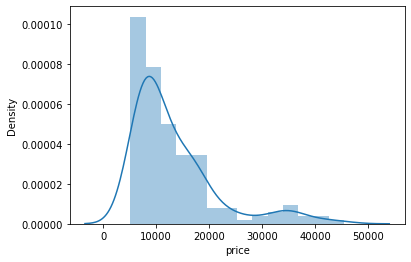

In [73]:
sns.distplot(dataTrain['price'])

In [57]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling 

ERROR: Invalid requirement: '#'
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy\\add_newdocs.py'
Consider using the `--user` option or check the permissions.



In [74]:
dataTrain.columns


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'carsize'],
      dtype='object')

In [75]:
dataTrain['car_brand'] = dataTrain['make'].copy()

In [76]:
dataTrain.drop('make', axis=1, inplace=True)

In [77]:
dataTrain.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'carsize',
       'car_brand'],
      dtype='object')

In [78]:
dataTrain['symboling'].value_counts().sort_index()

-2     2
-1    21
 0    59
 1    45
 2    28
 3    26
Name: symboling, dtype: int64

In [79]:
dataTrain[dataTrain.duplicated()]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,carsize,car_brand


In [80]:
dataTrain['car_brand'].value_counts().sort_index()

alfa-romero       3
audi              5
bmw               5
chevrolet         3
dodge             9
honda            12
isuzu             2
jaguar            3
mazda            16
mercedes-benz     8
mercury           1
mitsubishi       12
nissan           16
peugot            9
plymouth          6
porsche           4
renault           2
saab              5
subaru           12
toyota           28
volkswagen       11
volvo             9
Name: car_brand, dtype: int64

In [81]:
dataTrain['aspiration'].value_counts().sort_index()

std      147
turbo     34
Name: aspiration, dtype: int64

In [82]:
 dataTrain['num-of-doors'] = dataTrain['num-of-doors'].replace('0', dataTrain['num-of-doors'].mode()[0])

In [83]:
dataTrain['num-of-doors'].mode()[0]

'four'

In [84]:
dataTrain['num-of-doors'].value_counts().sort_index()

?         2
four    102
two      77
Name: num-of-doors, dtype: int64

In [85]:
dataTrain['num-of-doors'] = dataTrain['num-of-doors'].str.replace('?','0')


In [86]:
#normalized-losses
dataTrain['normalized-losses'] = dataTrain['normalized-losses'].str.replace('?','0')

In [87]:
dataTrain.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'carsize',
       'car_brand'],
      dtype='object')

In [88]:
dataTrain['num-of-doors'].value_counts().sort_index()

0         2
four    102
two      77
Name: num-of-doors, dtype: int64

In [90]:
dataTrain['symboling'].value_counts().sort_index()

-2     2
-1    21
 0    59
 1    45
 2    28
 3    26
Name: symboling, dtype: int64

In [91]:
dataTrain['engine-location'].value_counts().sort_index()

front    178
rear       3
Name: engine-location, dtype: int64

In [92]:
dataTrain['drive-wheels'].value_counts().sort_index()

4wd      8
fwd    108
rwd     65
Name: drive-wheels, dtype: int64

In [93]:
dataTrain['body-style'].value_counts().sort_index()

convertible     6
hardtop         8
hatchback      62
sedan          83
wagon          22
Name: body-style, dtype: int64

In [95]:
#dataTrain['make'].value_counts().sort_index()

In [96]:
dataTrain['num-of-cylinders'].value_counts().sort_index()

eight       4
five        9
four      140
six        22
three       1
twelve      1
two         4
Name: num-of-cylinders, dtype: int64

In [97]:
dataTrain['body-style'].value_counts().sort_index()

convertible     6
hardtop         8
hatchback      62
sedan          83
wagon          22
Name: body-style, dtype: int64

In [98]:
dataTrain['drive-wheels'].value_counts().sort_index()

4wd      8
fwd    108
rwd     65
Name: drive-wheels, dtype: int64

In [99]:
dataTrain['engine-location'].value_counts().sort_index()

front    178
rear       3
Name: engine-location, dtype: int64

In [100]:
dataTrain['wheel-base'].value_counts().sort_index()

86.60000      2
88.40000      1
88.60000      2
89.50000      3
91.30000      2
93.00000      1
93.10000      5
93.30000      1
93.70000     17
94.30000      1
94.50000     15
95.10000      1
95.30000      4
95.70000     11
95.90000      5
96.00000      1
96.10000      2
96.30000      6
96.50000      8
96.60000      1
96.90000      2
97.00000      4
97.20000      5
97.30000      6
98.40000      6
98.80000      6
99.10000      5
99.20000      1
99.40000      1
99.80000      1
100.40000     6
101.20000     2
102.00000     1
102.40000     5
102.70000     1
102.90000     2
103.30000     2
103.50000     2
104.30000     4
104.50000     2
104.90000     1
105.80000     3
106.70000     1
107.90000     5
108.00000     1
109.10000     5
110.00000     3
112.00000     1
113.00000     2
114.20000     3
115.60000     2
120.90000     1
Name: wheel-base, dtype: int64

In [101]:
dataTrain['fuel-system'].value_counts().sort_index()

1bbl    10
2bbl    58
4bbl     3
idi     18
mfi      1
mpfi    81
spdi     9
spfi     1
Name: fuel-system, dtype: int64

In [102]:
dataTrain['bore'].mode()[0]

'3.62'

In [104]:
dataTrain['bore'] = dataTrain['bore'].str.replace('?','0')
dataTrain['stroke'] = dataTrain['stroke'].str.replace('?','0')
dataTrain['horsepower'] = dataTrain['horsepower'].str.replace('?','0')
dataTrain['peak-rpm'] = dataTrain['peak-rpm'].str.replace('?','0')
dataTrain['normalized-losses'] = dataTrain['normalized-losses'].str.replace('?','0')



In [105]:

dataTrain['bore'] = dataTrain['bore'].astype(str).astype(float)
dataTrain['stroke'] = dataTrain['stroke'].astype(str).astype(float)
dataTrain['horsepower'] = dataTrain['horsepower'].astype(str).astype(float)
dataTrain['peak-rpm'] = dataTrain['peak-rpm'].astype(str).astype(float)
dataTrain['normalized-losses'] = dataTrain['normalized-losses'].astype(str).astype(float)

In [162]:
dataTrain['stroke'].describe()
dataTrain['horsepower'].describe()
dataTrain['peak-rpm'].describe()
dataTrain['normalized-losses'].describe()



count   181.00000
mean     98.16022
std      56.91672
min       0.00000
25%      81.00000
50%     104.00000
75%     134.00000
max     256.00000
Name: normalized-losses, dtype: float64

In [106]:
dataTrain['bore'] = dataTrain['bore'].replace(0,dataTrain['bore'].mean())
dataTrain['stroke'] = dataTrain['stroke'].replace(0,dataTrain['stroke'].mean())
dataTrain['horsepower'] = dataTrain['horsepower'].replace(0,dataTrain['horsepower'].mean())
dataTrain['peak-rpm'] = dataTrain['peak-rpm'].replace(0,dataTrain['peak-rpm'].mean())
dataTrain['normalized-losses'] = dataTrain['normalized-losses'].replace(0,dataTrain['normalized-losses'].mean())

In [164]:
#dataTrain['stroke'].value_counts().sort_index()

#dataTrain['horsepower'].value_counts().sort_index()
#dataTrain['peak-rpm'].value_counts().sort_index()
dataTrain['normalized-losses'].value_counts().sort_index()


65.00000      5
74.00000      4
77.00000      1
78.00000      1
81.00000      2
83.00000      3
85.00000      5
87.00000      1
89.00000      2
90.00000      1
91.00000      7
93.00000      4
94.00000      4
95.00000      5
98.00000      1
98.16022     34
101.00000     2
102.00000     5
103.00000     3
104.00000     6
106.00000     4
107.00000     1
108.00000     2
110.00000     2
113.00000     2
115.00000     3
118.00000     3
119.00000     2
121.00000     1
122.00000     4
125.00000     3
128.00000     5
129.00000     2
134.00000     6
137.00000     3
142.00000     1
145.00000     2
148.00000     4
150.00000     6
153.00000     2
154.00000     2
158.00000     2
161.00000     9
164.00000     2
168.00000     3
186.00000     1
188.00000     1
192.00000     1
194.00000     2
197.00000     2
231.00000     1
256.00000     1
Name: normalized-losses, dtype: int64

In [135]:
dataTrain['compression-ratio'].value_counts().sort_index()

7.00000      6
7.50000      4
7.60000      4
7.70000      2
7.80000      1
8.00000      6
8.10000      2
8.30000      3
8.40000      3
8.50000     13
8.60000      5
8.70000      9
8.80000      2
9.00000     43
9.10000      1
9.20000      7
9.30000     10
9.31000      1
9.40000     21
9.41000      1
9.50000     12
9.60000      3
10.00000     2
10.10000     1
11.50000     1
21.00000     5
21.50000     4
21.90000     1
22.00000     1
22.50000     2
22.70000     1
23.00000     4
Name: compression-ratio, dtype: int64

In [136]:
dataTrain['compression-ratio'].describe()

count   181.00000
mean     10.15425
std       3.98231
min       7.00000
25%       8.60000
50%       9.00000
75%       9.40000
max      23.00000
Name: compression-ratio, dtype: float64

In [144]:
dataTrain['peak-rpm'].value_counts().sort_index()

4150     5
4200     5
4250     2
4350     4
4400     3
4500     5
4650     1
4750     4
4800    34
4900     1
5000    24
5100     2
5200    21
5250     6
5300     1
5400     9
5500    33
5600     1
5800     6
5900     3
6000     8
6600     1
?        2
Name: peak-rpm, dtype: int64

In [152]:
dataTrain['price'].describe()

count     181.00000
mean    13271.31492
std      8106.47963
min      5118.00000
25%      7775.00000
50%     10295.00000
75%     16500.00000
max     45400.00000
Name: price, dtype: float64

In [107]:
dataTrain['mpg'] = (dataTrain['city-mpg'] + dataTrain['highway-mpg'])/2

In [108]:
dataTrain['mpg'].describe()

count   181.00000
mean     27.88950
std       6.60736
min      15.00000
25%      22.50000
50%      27.00000
75%      31.50000
max      51.50000
Name: mpg, dtype: float64

In [109]:
dataTrain.drop(['city-mpg','highway-mpg'],axis=1,inplace=True)

### Univariate Analysis


In [110]:
dataTrain.head(50)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,carsize,car_brand,mpg
0,-1,65.00000,gas,std,four,hatchback,fwd,front,102.40000,2458,ohc,four,122,mpfi,3.31000,3.54000,8.70000,92.00000,4200.00000,11248,629411.86000,toyota,29.50000
1,0,188.00000,gas,std,two,sedan,rwd,front,101.20000,2710,ohc,six,164,mpfi,3.31000,3.19000,9.00000,121.00000,4250.00000,20970,622095.55200,bmw,24.50000
2,0,98.16022,gas,std,four,wagon,fwd,front,96.10000,2579,ohc,four,132,mpfi,3.46000,3.90000,8.70000,103.01657,5050.27624,9295,666250.20000,renault,27.00000
3,0,161.00000,diesel,turbo,four,sedan,rwd,front,107.90000,3197,l,four,152,idi,3.70000,3.52000,21.00000,95.00000,4150.00000,13200,724074.87600,peugot,30.50000
4,-2,103.00000,gas,std,four,sedan,rwd,front,104.30000,2935,ohc,four,141,mpfi,3.78000,3.15000,9.50000,114.00000,5400.00000,15985,713029.63200,volvo,26.00000
5,1,118.00000,gas,turbo,two,hatchback,fwd,front,93.70000,2128,ohc,four,98,mpfi,3.03000,3.39000,7.60000,102.00000,5500.00000,7957,509815.59200,dodge,27.00000
6,0,145.00000,gas,std,four,sedan,rwd,front,113.00000,4066,dohc,six,258,mpfi,3.63000,4.17000,8.10000,176.00000,4750.00000,32250,733506.04800,jaguar,17.00000
7,3,98.16022,gas,std,two,hardtop,rwd,rear,89.50000,2756,ohcf,six,194,mpfi,3.74000,2.90000,9.50000,207.00000,5900.00000,32528,566490.60000,porsche,21.00000
8,0,89.00000,gas,std,four,wagon,fwd,front,97.00000,2455,ohcf,four,108,mpfi,3.62000,2.64000,9.00000,94.00000,5200.00000,10198,601385.70000,subaru,28.00000
9,3,153.00000,gas,turbo,two,hatchback,fwd,front,96.30000,2370,ohc,four,110,spdi,3.17000,3.46000,7.50000,116.00000,5500.00000,9959,558921.48000,mitsubishi,26.50000


In [190]:
dataTrain['price'] = dataTrain['price']/1000

In [191]:
dataTrain['price']


0     11.24800
1     20.97000
2      9.29500
3     13.20000
4     15.98500
5      7.95700
6     32.25000
7     32.52800
8     10.19800
9      9.95900
10     7.78800
11    10.89800
12    12.29000
13    10.34500
14    16.84500
15    11.25900
16     6.09500
17    31.60000
18     8.01300
19     6.47900
20    18.62000
21    28.24800
22    18.15000
23    15.64500
24     6.69200
25    11.85000
26    18.42000
27     8.84500
28    16.51500
29    35.05600
30     7.29500
31     8.18900
32     6.37700
33    18.39900
34    16.55800
35     9.29800
36    24.56500
37    16.50300
38    13.86000
39    12.96400
40     6.33800
41     9.09500
42    14.39900
43     9.27900
44    12.76400
45     7.19800
46     9.96000
47     9.98900
48     8.24900
49    41.31500
50     8.49500
51    17.45000
52     9.63900
53    10.94500
54    11.84500
55     7.60900
56     7.77500
57     7.09900
58     8.05800
59    14.86900
60     7.60900
61    10.69800
62    16.90000
63    17.07500
64     9.54900
65     5.15100
66    23.8

In [192]:
#Extracting Categorical and numerical data 
cat_col = [column for column in dataTrain.columns if dataTrain[column].dtypes == 'O']
print(cat_col)


['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'car_brand']


In [193]:
num_col = [column for column in dataTrain.columns if dataTrain[column].dtypes != 'O']
print(num_col)


['symboling', 'normalized-losses', 'wheel-base', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'price', 'carsize', 'mpg']


In [194]:
'''1. price analysis with no of doors and car brand
2. price with body-style & engine-size
3. price horsepower
'''

'1. price analysis with no of doors and car brand\n2. price with body-style & engine-size\n3. price horsepower\n'

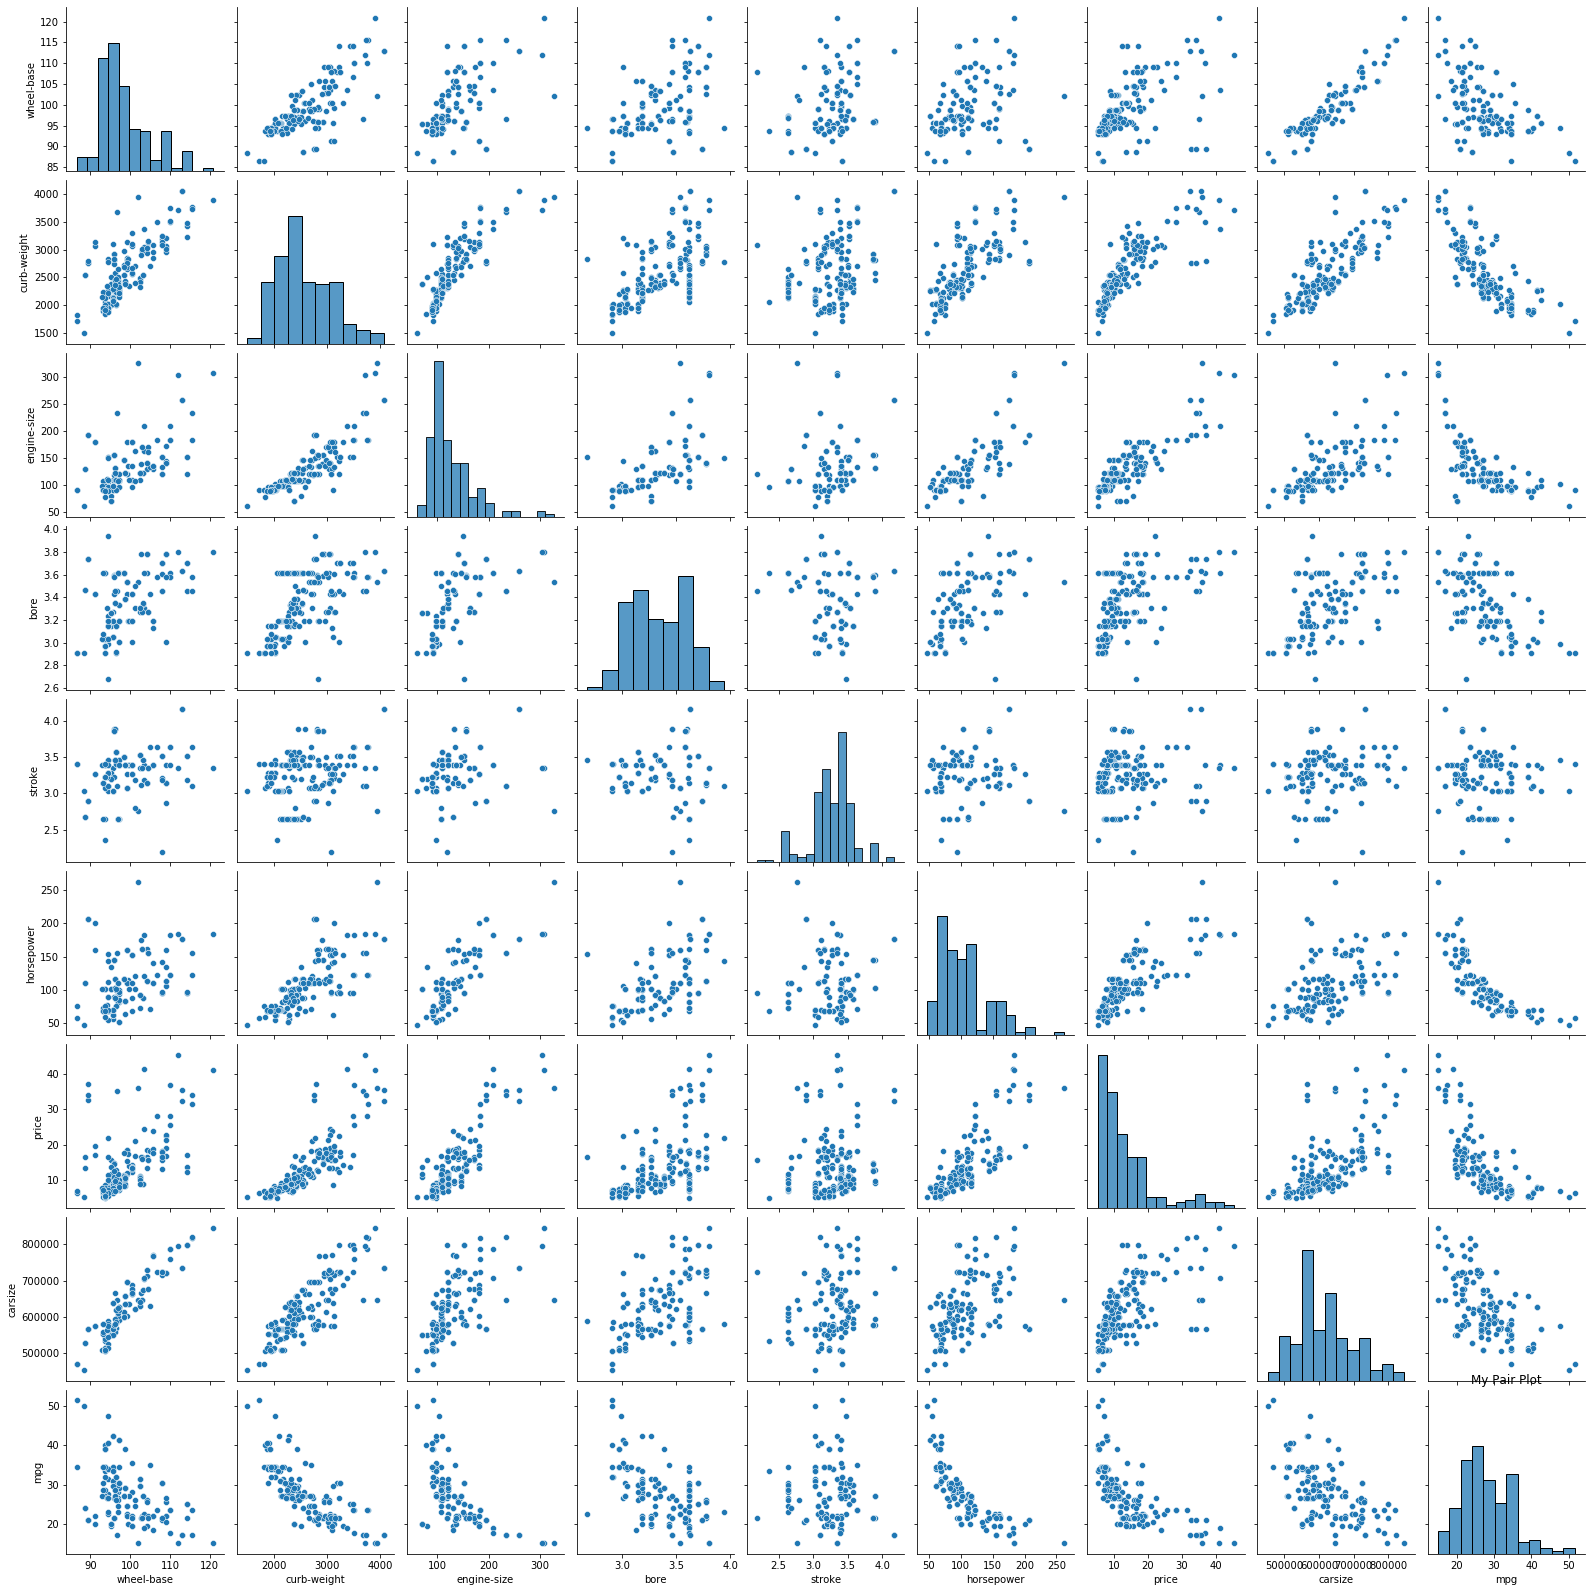

In [195]:
#papaer = plt.figure(figsize=(15,7))

subset = dataTrain[['wheel-base', 'curb-weight', 'engine-size', 'bore', 'stroke', 'horsepower', 'price', 'carsize', 'mpg']]
# Using magic of pandas area() function for plotting stack area plot
sns.pairplot(data=subset, size=2.5, diag_kind='hist')

plt.title('My Pair Plot')
# Dispaly the output by rendering visual on the screen
plt.show()

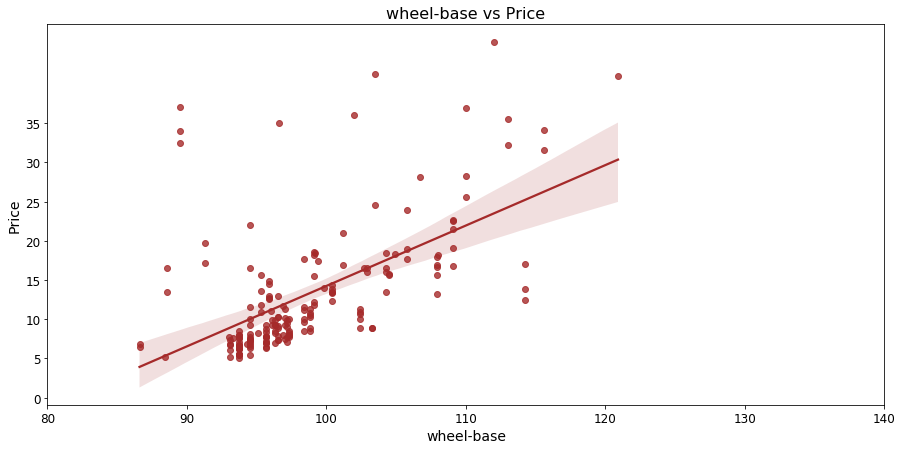

In [197]:
paper = plt.figure(figsize = (15,7))
#dataTrain.plot.scatter(x='wheel-base', y='price', color='purple',figsize=[15, 7])
sns.regplot(x='wheel-base', y='price', data=dataTrain, color='brown')
plt.xticks(ticks=np.arange(80, 150, 10), size=12)

# Changing y-ticks ranging from 0 to 800 with step size of 50 and label size of 12
plt.yticks(ticks=np.arange(0, 40, 5), size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='wheel-base', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Price', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='wheel-base vs Price', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()


observation
1. Car price is positively dependent to the wheel-base.

<Figure size 1080x504 with 0 Axes>

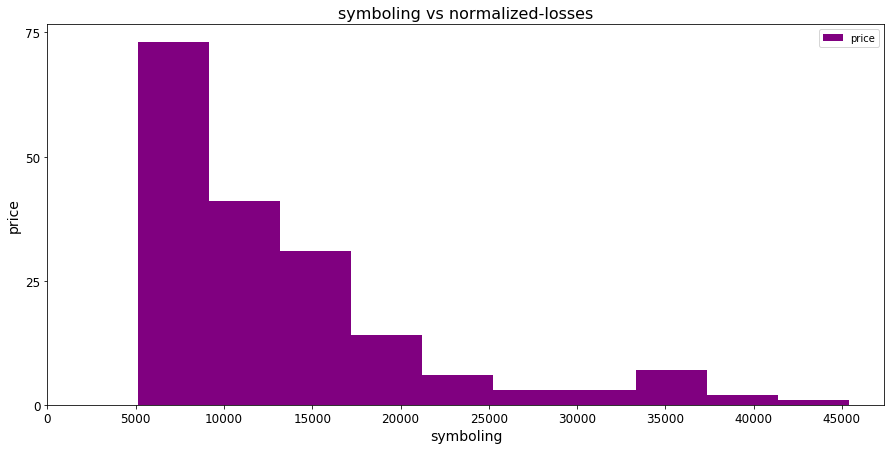

In [140]:
paper = plt.figure(figsize = (15,7))
dataTrain.plot.hist(x='mpg', y='price', color='purple',figsize=[15, 7])
plt.xticks(ticks=np.arange(0, 50000, 5000), size=12)

# Changing y-ticks ranging from 0 to 800 with step size of 50 and label size of 12
plt.yticks(ticks=np.arange(0, 90, 25), size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='symboling', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='price', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='symboling vs normalized-losses', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

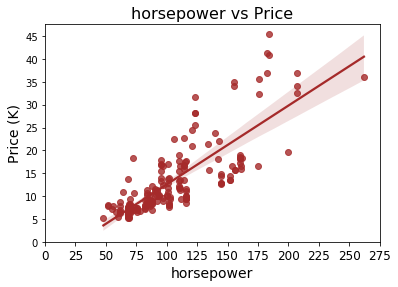

In [213]:
#paper = plt.figure(figsize = (15,7))
#dataTrain.plot.hexbin(x='horsepower', y='price', color='purple',figsize=[15, 7])
sns.regplot(x='horsepower', y='price', data=dataTrain, color='brown')
plt.xticks(ticks=np.arange(0, 300, 25), size=12)

# Changing y-ticks ranging from 0 to 800 with step size of 50 and label size of 12
plt.yticks(ticks=np.arange(0, 50, 5), size=10)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='horsepower', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Price (K)', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='horsepower vs Price', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
paper = plt.figure(figsize = (20,10))
sns.regplot(x='horsepower', y='price', data=dataTrain, color='brown')
ax1 = paper.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(x,y, color='red')
ax1.set_xlabel('this my x')
ax1.set_ylabel('this is my y')
ax1.set_title("titll")

ax2 = paper.add_axes([0.2,0.5,0.2,0.2])
ax2.plot(x,y,color='pink')
ax2.set_xlabel('this my x')
ax2.set_ylabel('this is my y')
ax1.set_title("titll")


observation:
    1. car Prize maximize betweenn 5000 to 10000.

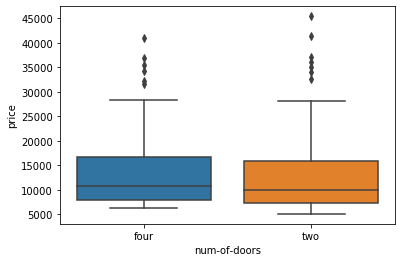

In [176]:
sns.boxplot(data=dataTrain, x="num-of-doors", y="price")


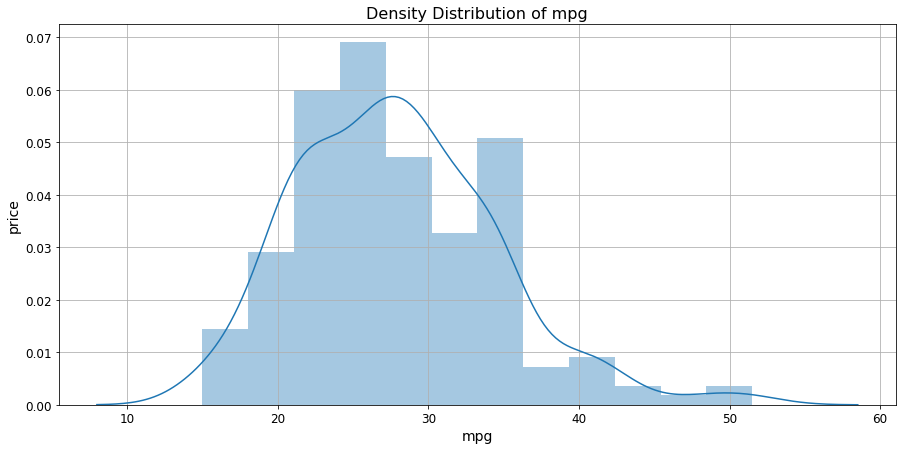

In [181]:
#sns.boxplot(data=dataTrain, x="car_brand", y="price")

# Initialize figure of size 15 X 7
fig = plt.figure(figsize=(15, 7))

# Plot density distribution of age
sns.distplot(a=dataTrain['mpg'], kde=True)

# Add some cosmetics
plt.title(label='Density Distribution of mpg', size=16)
plt.xlabel(xlabel='mpg', size=14)
plt.ylabel(ylabel='price', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)

# Display the plot
plt.show()

In [ ]:
# Price is max for mpg between 20 and 30
# Price gets dropped if mpg is less than 20 or greater than 30